# NBA Lineup Selector
Author: Kahlil Gedin <br>
Date: 12/24/19

## import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import t


In [2]:
def clean1(self):
    self.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
    self.drop(["a"], axis=1, inplace=True)
    
def clean2(self):
    self.rename({"Unnamed: 0.1":"a"}, axis="columns", inplace=True)
    self.drop(["a"], axis=1, inplace=True)

In [3]:
def pdfA(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2)))
    return b
def pdfO(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2))*2.5)
    return b

def pdfT(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2))*18000)
    return b

def pdfV(x, mean, std):
    b=[]
    for i in range(len(x)):
        b.append((1/(std*math.sqrt(2*math.pi)))*math.exp((-(x[i]-mean)**2)/(2*std**2))*20000)
    return b

In [4]:
def norm(x,y): 
  return (x - y['mean']) / y['std']

## import data

In [5]:
data1 = pd.read_csv('data/6G27DEC19.csv')
data2 = pd.read_csv('data/13G28DEC19.csv')
data3 = pd.read_csv('data/4G29DEC19.csv')
data4 = pd.read_csv('data/6G30DEC19.csv')
data5 = pd.read_csv('data/4G31DEC19.csv')
data6 = pd.read_csv('data/4G1JAN20.csv')
data7 = pd.read_csv('data/9G2JAN20.csv')

In [6]:
clean1(data1)
clean2(data1)

clean1(data2)
clean2(data2)

clean1(data3)
clean2(data3)

clean1(data4)
clean2(data4)

clean1(data5)
clean2(data5)

clean1(data6)
clean2(data6)

clean1(data7)
clean2(data7)

In [7]:
bdata = data1
bdata = bdata.append(data2)
bdata = bdata.append(data3)
bdata = bdata.append(data4)
bdata = bdata.append(data5)
bdata = bdata.append(data6)
bdata = bdata.append(data7)

C:\Users\kyler\Anaconda4\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [8]:
#bdata.sort_values(by='final', ascending = False)

In [9]:
data1.sort_values(by='final', ascending = False)

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,odds,final
275,276,1,0.1,36,3.6,964,96.4,-35280,338.7248,238.885650,36.329511,2.583140e-01,317.50
949,950,30,3.0,161,16.1,839,83.9,-8680,353.2649,256.714881,36.512191,1.181506e+00,315.75
700,701,4,0.4,88,8.8,912,91.2,-27840,355.3328,245.461035,37.981261,1.545424e-02,315.00
525,526,27,2.7,178,17.8,822,82.2,-7840,363.6690,259.407003,37.793466,4.449713e-01,312.75
769,770,5,0.5,64,6.4,936,93.6,-30320,345.5566,242.206390,37.259921,4.953007e-01,311.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2,0.2,41,4.1,959,95.9,-34280,337.9277,239.528141,36.502860,6.059681e-07,139.50
604,605,2,0.2,48,4.8,952,95.2,-33440,333.3708,236.475949,34.360090,3.827565e-02,138.25
481,482,3,0.3,79,7.9,921,92.1,-29320,343.5391,239.555916,36.093342,1.224672e-01,138.00
942,943,20,2.0,149,14.9,851,85.1,-14120,361.9167,253.878821,38.233980,3.318212e-06,127.75


# explore data

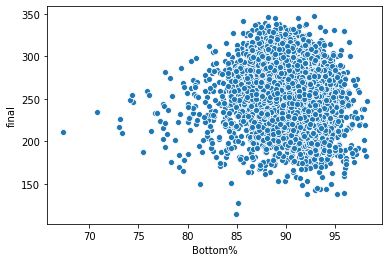

In [55]:
sns.scatterplot(bdata['Bottom%'], bdata.final)

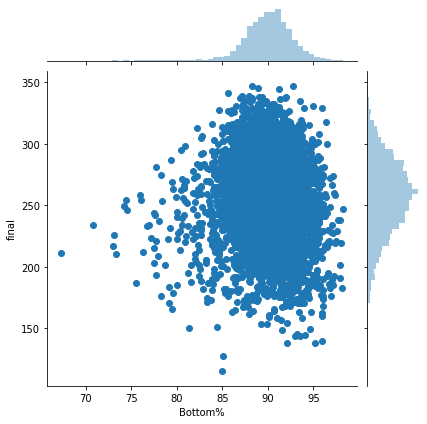

In [62]:
sns.jointplot(x= bdata['Bottom%'], y=bdata.final, data=bdata);

In [141]:
#intervala = 1
#a = np.arange(bdata.AvgPt.min(), bdata.AvgPt.max()+intervala, intervala)

In [710]:
#sns.scatterplot(a,pdfA(a,bdata.AvgPt.mean(),bdata.AvgPt.std()))
#sns.scatterplot(bdata.AvgPt, bdata.final)
#plt.xlim(360,420)

In [60]:
g = sns.PairGrid(bdata)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000017C43C6E048> (for post_execute):


KeyboardInterrupt: 

In [143]:
#intervalb = 0.00001
#b = np.arange(bdata.odds.min(), bdata.odds.max()+intervalb, intervalb)

In [709]:
#sns.scatterplot(b,pdfO(b,bdata.odds.mean(),bdata.odds.std()))
#sns.scatterplot(bdata.odds, bdata.final)
#plt.xlim(0.002,0.014)

In [145]:
#intervalc = 1
#c = np.arange(bdata.Top10.min(), bdata.Top10.max()+intervalc, intervalc)

In [708]:
#sns.scatterplot(c,pdfT(c,bdata.Top10.mean(),bdata.Top10.std()))
#sns.scatterplot(bdata.Top10, bdata.final)
#plt.xlim(0.002,0.014)


## model setup

In [69]:
ml = bdata.drop('Line#', axis=1)

In [77]:
# splitting into training and testing set
train_data = ml.sample(frac=0.8, random_state = 0)

#change seed to 3
test_data = ml.drop(train_data.index)

In [78]:
# saving scores as labels
train_label = train_data.final
test_label = test_data.final

In [79]:
# dropping the label from the data sets
train_data = train_data.drop('final',axis=1)
test_data = test_data.drop('final',axis=1)

In [80]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()

test_stats = test_data.describe()
test_stats = test_stats.transpose()

In [81]:
ntrain_data = norm(train_data, train_stats)
ntest_data = norm(test_data, test_stats)

## building model

In [368]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [369]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


##  training model

In [380]:
EPOCHS = 50000

history = model.fit(
  train_data, train_label,
  epochs=EPOCHS, validation_split = 0.63, verbose=0)

In [381]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

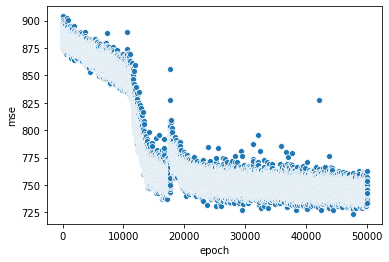

In [382]:
sns.scatterplot(hist.epoch, hist.mse)
#plt.xlim(40000,50000)

In [383]:
test_data

,AvgPt,Bottom,Bottom%,ROI,Top1,Top1%,Top10,Top10%,ceil,odds,std


In [60]:
test_predictions = model.predict(ntest_data)

ValueError: Structure is a scalar but len(flat_sequence) == 0 > 1

In [586]:
test = pd.DataFrame() 
test.insert(0,'actual', test_label)
test.insert(1,'predict',test_predictions)

In [703]:
#sns.scatterplot(test.predict, test.actual)

## save model

In [57]:
#model.save('luEval4_1.h5')

## load model

In [330]:
model =  keras.models.load_model('luEval3.h5')

## format data

In [359]:
data = pd.read_csv('data/9G2JAN20.csv')
clean1(data)
clean2(data)
datal =data.drop('Line#', axis=1)
datal = datal.drop('final', axis =1)

In [360]:
#data_label = datal['final']
#data_data = datal.drop('final', axis =1)

In [361]:
data_stats = datal.describe()
data_stats = data_stats.transpose()
ndata_data = norm(datal, data_stats)

## make predictions

In [362]:
predictions = model.predict(ndata_data)

In [363]:
# if there is a column with final use this
#data.insert(13, 'predict', predictions)

data.insert(11, 'predict', predictions)

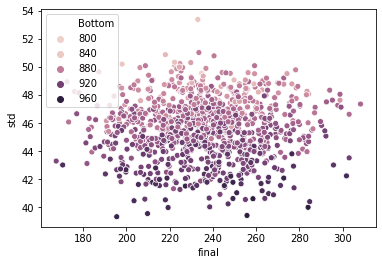

In [364]:
sns.scatterplot(data.final,data['std'], hue = data.Bottom)
#plt.xlim(-1000,1000)

## filter results

In [337]:

lo= data[(data.predict >= 135)]
lo= lo[lo.predict <= 323]
lo = lo[lo.odds>= 0.0038]
#lo = lo[lo.AvgPt>= 369]**
lo = lo[lo.AvgPt<= 410]
#lo = lo[lo.stat>= 200]**

In [338]:
lo

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,predict,odds,final
0,1,11,1.1,84,8.4,916,91.6,-25520,362.0162,259.076262,37.694819,229.300568,0.073761,299.75
1,2,10,1.0,127,12.7,873,87.3,-20760,367.4122,272.883893,37.293004,199.906860,0.008456,247.00
2,3,11,1.1,118,11.8,882,88.2,-21440,379.0311,270.193111,38.458111,271.027618,0.011330,267.00
3,4,11,1.1,113,11.3,887,88.7,-22040,373.8982,271.735007,38.456746,284.891205,0.008363,268.50
4,5,11,1.1,112,11.2,888,88.8,-22160,374.8605,266.696024,39.287316,286.936310,0.004029,266.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,993,12,1.2,113,11.3,887,88.7,-21640,373.0142,268.877008,39.110554,313.244659,0.375647,261.50
993,994,9,0.9,80,8.0,920,92.0,-26800,363.7031,263.062075,35.970067,194.258087,0.120581,264.00
995,996,11,1.1,89,8.9,911,91.1,-24920,355.6973,263.350561,34.953373,196.366837,0.036354,227.00
996,997,15,1.5,100,10.0,900,90.0,-22000,363.6329,265.705552,36.044045,227.283478,0.018501,259.75


In [339]:
#len(data[data.final>300].sort_values(by="Top10", ascending = False)[:70])

In [340]:
optimal = lo.sort_values(by='predict', ascending = False)[:70]

In [341]:
#len(optimal[optimal.final>= 300])

5

In [374]:
#optimal.sort_values(by='final', ascending = False)[:70]

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,predict,odds,final
821,822,9,0.9,89,8.9,911,91.1,-25720,358.6315,262.527276,37.562331,309.477814,0.293486,315.25
661,662,12,1.2,111,11.1,889,88.9,-21880,374.4396,271.653683,38.216066,304.614990,0.346820,307.50
456,457,7,0.7,93,9.3,907,90.7,-26040,358.7612,268.937789,36.387274,321.605072,0.074848,300.50
351,352,15,1.5,135,13.5,865,86.5,-17800,375.2377,272.839240,38.100222,316.778931,2.607848,300.00
362,363,11,1.1,122,12.2,878,87.8,-20960,374.4649,268.695283,38.358929,316.926880,0.394468,300.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,794,16,1.6,106,10.6,894,89.4,-20880,374.9271,266.690492,37.097284,304.911560,0.080591,242.50
83,84,15,1.5,96,9.6,904,90.4,-22480,365.8815,265.441669,40.164929,313.593597,1.220412,237.75
596,597,18,1.8,119,11.9,881,88.1,-18520,371.9782,266.583968,39.167809,316.987366,1.013710,237.25
516,517,11,1.1,103,10.3,897,89.7,-23240,361.4070,263.200065,39.179693,315.149261,0.043315,233.75


In [324]:
data.sort_values(by= 'predict', ascending= False)

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,predict,odds,final
764,765,6,0.6,48,4.8,952,95.2,-31840,345.7441,253.314241,37.540448,428.439301,2.063721,259.00
603,604,9,0.9,69,6.9,931,93.1,-28120,358.1432,262.424665,36.011049,419.842590,0.011921,264.50
633,634,8,0.8,56,5.6,944,94.4,-30080,361.0782,258.595165,35.634152,397.726074,0.036178,247.00
550,551,15,1.5,126,12.6,874,87.4,-18880,380.8640,267.995294,40.838718,396.149658,0.375527,264.75
376,377,17,1.7,126,12.6,874,87.4,-18080,370.5925,274.307034,37.194001,394.471313,3.637291,297.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,333,2,0.2,99,9.9,901,90.1,-27320,373.0994,267.446844,38.404327,-193.491959,10.123791,274.50
92,93,10,1.0,116,11.6,884,88.4,-22080,368.8203,268.761873,38.451312,-222.927841,11.683913,280.50
203,204,9,0.9,113,11.3,887,88.7,-22840,376.6636,270.526172,38.936390,-225.120087,5.563684,278.50
10,11,13,1.3,128,12.8,872,87.2,-19440,377.5655,271.510114,39.260148,-371.124664,5.701117,301.75


# save results

In [20]:
optimal.to_csv('f_line.csv')

In [21]:
optimal

,Line#,Top1,Top1%,Top10,Top10%,Bottom,Bottom%,ROI,ceil,AvgPt,std,predict,odds
411,412,13,1.3,91,9.1,909,90.9,-23880,374.8549,272.976409,39.445438,322.986176,0.603631
307,308,7,0.7,94,9.4,906,90.6,-25920,377.0126,270.622931,40.198544,322.954987,0.068814
682,683,10,1.0,98,9.8,902,90.2,-24240,373.8575,272.084209,40.703100,322.587708,1.323930
874,875,10,1.0,105,10.5,895,89.5,-23400,373.3911,273.506383,40.017021,322.175385,0.016279
543,544,11,1.1,101,10.1,899,89.9,-23480,382.2659,273.401834,40.766834,322.082489,0.785355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,9,0.9,82,8.2,918,91.8,-26560,373.1843,275.120567,37.716901,307.489075,0.201550
517,518,10,1.0,102,10.2,898,89.8,-23760,380.6403,271.590894,40.451727,307.414429,0.028458
87,88,5,0.5,95,9.5,905,90.5,-26600,366.9992,272.192350,37.023999,307.304291,0.515931
377,378,6,0.6,93,9.3,907,90.7,-26440,376.9080,271.320477,39.913214,307.177246,0.095730
